In [1]:
%matplotlib widget
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_

# matplotlib.pyplot will be used in these examples to generate the plots visualizing the data
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
import numpy as np
from scipy import signal

# import datashader as ds
# import datashader.transfer_functions as tf
import pandas as pd
import numpy as np
# import pynapple as nap


import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

na = np.array
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import h5py

In [2]:

# file_name = '/Users/ovinogradov/Documents/Projects/SCN1A/MEA-analysis/data/Shaima_example/2025-01-17T21-17-46McsRecording.h5'
target_file = '/home/ovinogradov/Projects/MEA-analysis/data/R1648H_filt/R1648H_21-03-25_slice6_2025-03-21T14-52-28McsRecording.h5_filtered.h5'
# with h5py.File('filtered.h5', 'r') as f:
with h5py.File(target_file, 'r') as f:
    print(f['data'].shape)
    filt = f['data'][:,:]
    # subsampling_rate = f['resampled_rate']
# with h5py.File(file_name, "r") as f:
#     data= f['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
#     print(data)
#     # chunk_size = 1000  # Choose an optimal chunk size
#     data_series = data[10,:]  # Process in chunks


(4492000, 252)


In [3]:
with h5py.File(target_file, 'r') as f:
    # print(f['data'].shape)
    # filt = f['data'][:,:]
    subsampling_rate = na(f['resampled_rate'])
    adc_step = na(f['scale'])

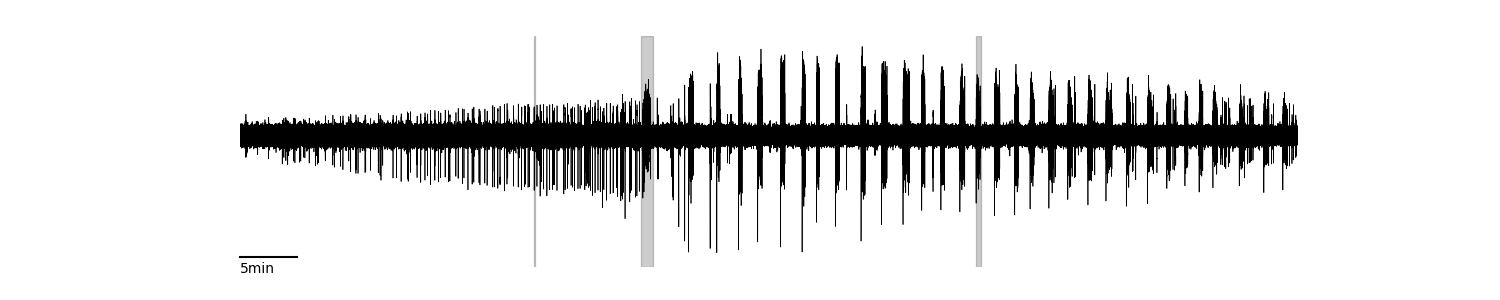

In [132]:
plt.figure(figsize = (15,3))
import matplotlib.patches as patches

plt.plot(np.arange(0,len(filt))*(1/subsampling_rate)/60,filt[:,10]*adc_step,'-',linewidth = 0.5,color='k'),#);
# plt.xlim(85,140.3)
plt.plot([0,5],[-.00005,-.00005],color='k')
plt.text(0.,-.000057,'5min')
blocks = na(na([[26.01,26.09],[35.5,36.5],[65.1,65.6]])*(subsampling_rate)*60,dtype = 'int')# in s
for block in na(blocks)*(1/subsampling_rate)/60: 
    plt.axvspan(block[0],block[1],color='k',alpha=0.2)
# rect1 = patches.Rectangle((2, 2), 4, 3, linewidth=2, edgecolor='red', facecolor='none')

# plt.plot([-1,-1],[-.00002,.0000],color='k')
# plt.text(-4.,-.0000,'1µV')
# plt.ylim([-5e-5,8e-5])
plt.axis('off')
plt.show()

# plt.ax

In [91]:
def generate_axes(fig):
    gridspec = fig.add_gridspec(nrows=2, ncols=12)
    axes = {}
    axes['1'] = fig.add_subplot(gridspec[0:2, 0:2])
    axes['2'] = fig.add_subplot(gridspec[0:2, 2:6])
    axes['3'] = fig.add_subplot(gridspec[0:2, 6:10])
    return axes



TypeError: generate_axes() missing 1 required positional argument: 'fig'

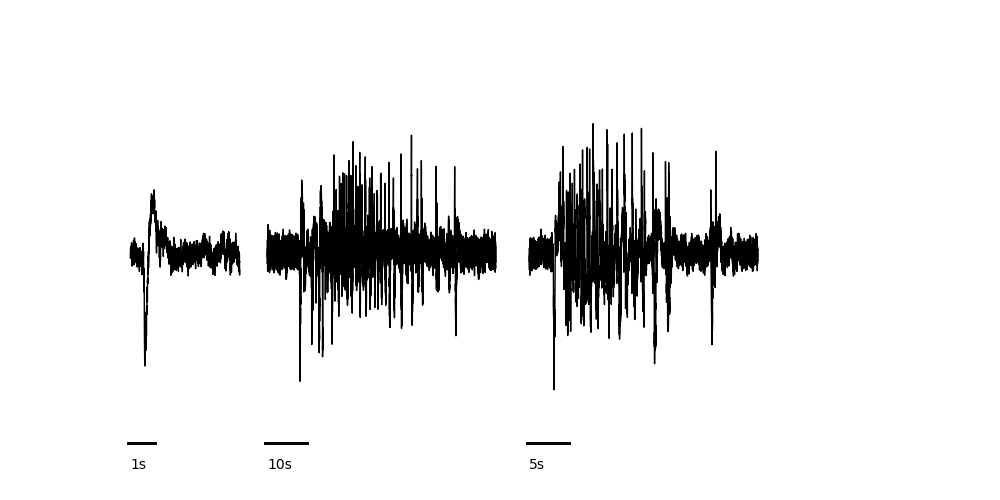

In [122]:
fig = plt.figure(figsize = (10,5))
axes = generate_axes(fig)
x_ax = [1,10,5]
x_ax_label = ['1s','10s','5s']
for i,time in enumerate(blocks):
    # plt.subplot(1,3,i+1)
    cut_out = filt[time[0]:time[1],20]*adc_step
    axes['%s'%(i+1)].plot(np.arange(0,len(cut_out))*(1/subsampling_rate),cut_out,'-k',linewidth = 1.);
    # plt.xlim(time[0],time[1])
    axes['%s'%(i+1)].set_ylim([-4e-5,4e-5])
    axes['%s'%(i+1)].plot([0,x_ax[i]],[-4e-5,-4e-5],color='k',linewidth = 5)
    axes['%s'%(i+1)].text(0.,-4.5e-5,x_ax_label[i])
    axes['%s'%(i+1)].axis('off')
plt.show()

In [25]:
plt.plot(np.arange(0,len(filt))*(1/subsampling_rate)/60,filt[:,10]*adc_step,'-',linewidth = 0.5,color='k');


np.float64(0.00125)